In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [144]:
df=pd.read_csv('cleaned_data/chanellos_reviews_processed.csv')
calz_df=pd.read_csv('cleaned_data/calz_processed.csv')

# dropping columns that are not shared or redundant
calz_df=calz_df.drop(['owner_response','owner_response_time','Unnamed: 0'],axis=1)
df=df.drop('Unnamed: 0',axis=1)

## Data Cleaning

In [145]:
df.head()

,time,customer_name,review_content,review_rating,store_name,store_rating,store_address,tot_num_rate,latitude,longitude
0,1.581293e+09,lauren sams,Great and fast service with excellent food.,5,Chanello's Pizza #33,3.1,1122 George Washington Hwy N,124,36.782,-76.338
1,1.550945e+09,Krys Peirce,NaN,1,Chanello's Pizza #33,3.1,1122 George Washington Hwy N,124,36.782,-76.338
2,1.550945e+09,Janel Brosseit,This rating goes more towards the food. Just r...,2,Chanello's Pizza #33,3.1,1122 George Washington Hwy N,124,36.782,-76.338
3,1.580593e+09,Ashley Heater,NaN,4,Chanello's Pizza #33,3.1,1122 George Washington Hwy N,124,36.782,-76.338
4,1.456272e+09,Alexandra Kehl,"Waited over an hour for our food, then the man...",1,Chanello's Pizza #33,3.1,1122 George Washington Hwy N,124,36.782,-76.338


In [146]:
calz_df.head()

,time,customer_name,review_content,review_rating,store_name,store_rating,store_address,num_to_rate,latitude,longitude
0,1.551463e+09,Jeanette Zeeb,It's ok,3,Cal'z Pizza,4.0,3678 Sewells Point Rd,322,36.918,-76.2
1,1.519906e+09,Daniel Mcquitty,Food was great and fast service.,5,Cal'z Pizza,4.0,3678 Sewells Point Rd,322,36.918,-76.2
2,1.577291e+09,Kuki Hell,DELICIOUS. So far had the calzown and it was b...,5,Cal'z Pizza,4.0,3678 Sewells Point Rd,322,36.918,-76.2
3,1.581111e+09,Thomas Hall,Small wings a bit overpriced,3,Cal'z Pizza,4.0,3678 Sewells Point Rd,322,36.918,-76.2
4,1.565833e+09,Mister Henderson,fast service good food,4,Cal'z Pizza,4.0,3678 Sewells Point Rd,322,36.918,-76.2


In [147]:
# check to see how many floats we have in the text column
print(df['review_content'].isna().sum())
print(calz_df['review_content'].isna().sum())

779
84


In [148]:
# change review content that is of type float(np.array) to an empty string ''
def convert_reviews(x):
    if isinstance(x,float):
        # not a number return an empty string so my sort dosent break
        return ''
    else:
        # return the text found to lowercase and with leading and following
        # spaces removed
        return x.lower().strip()
    # if nothing has happend then raise runtime error something is not working
    raise RuntimeError

# I need to remove the putuation from each of our review 
# content cells because im only going to be looking at 
# the words themselves not nessisarly their use in a sentence
import string
# make a transformation table to strip puctuation from words
table=str.maketrans('','',string.punctuation)
def strip_punc(x):
    return ''.join([w.translate(table) for w in x])

# sepeating the dataframes and doing some data cleaning

#### convert reviews and strip punctuation from chanello's df

In [149]:
# make changes to the df
df['review_content']=df['review_content'].apply(convert_reviews)
df['review_content']=df['review_content'].apply(strip_punc)

#### convert reviews and strip punctuation from calz df

In [150]:
# clean the calz dataset using the same functions that i cleaned that chanell's dataset above with
calz_df['review_content']=calz_df['review_content'].apply(convert_reviews)
calz_df['review_content']=calz_df['review_content'].apply(strip_punc)

In [169]:
# seperate the low ratings
condition=df['review_rating']<=2
df_low=df[condition]

# seperate the high ratings
condition=df['review_rating']>=4
df_high=df[condition]

# convert the review content into series of words that make up the content
words_low=pd.Series(' '.join(df_low.review_content).split())
words_high=pd.Series(' '.join(df_high.review_content).split())

#not words high that are in words low
high_notin_low=words_high[~words_high.isin(words_low)]
# not words low that are in words high
low_notin_high=words_low[~words_low.isin(words_high)]

# create a dataframe with the good and bad word values in them
chanellos=pd.DataFrame()
chanellos['good']=high_notin_low.value_counts()[:10].index.to_numpy()
chanellos['y_good']=high_notin_low.value_counts()[:10].values
chanellos['bad']=low_notin_high.value_counts()[:10].index.to_numpy()
chanellos['y_bad']=low_notin_high.value_counts()[:10].values

In [171]:
# make high and low df's
df_low=calz_df[calz_df['review_rating']<=2]
df_high=calz_df[calz_df['review_rating']>=4]
# sep df's into series word list's
words_low=pd.Series(' '.join(df_low.review_content).split())
words_high=pd.Series(' '.join(df_high.review_content).split())
# make not in lists
calz_hnotl=words_high[~words_high.isin(words_low)]
calz_lnoth=words_low[~words_low.isin(words_high)]

# create a dataframe with the good and bad word values in them
calz=pd.DataFrame()
calz['good']=calz_hnotl.value_counts()[:10].index.to_numpy()
calz['y_good']=calz_hnotl.value_counts()[:10].values
calz['bad']=calz_lnoth.value_counts()[:10].index.to_numpy()
calz['y_bad']=calz_lnoth.value_counts()[:10].values

#### define a plotting function to plot the above data

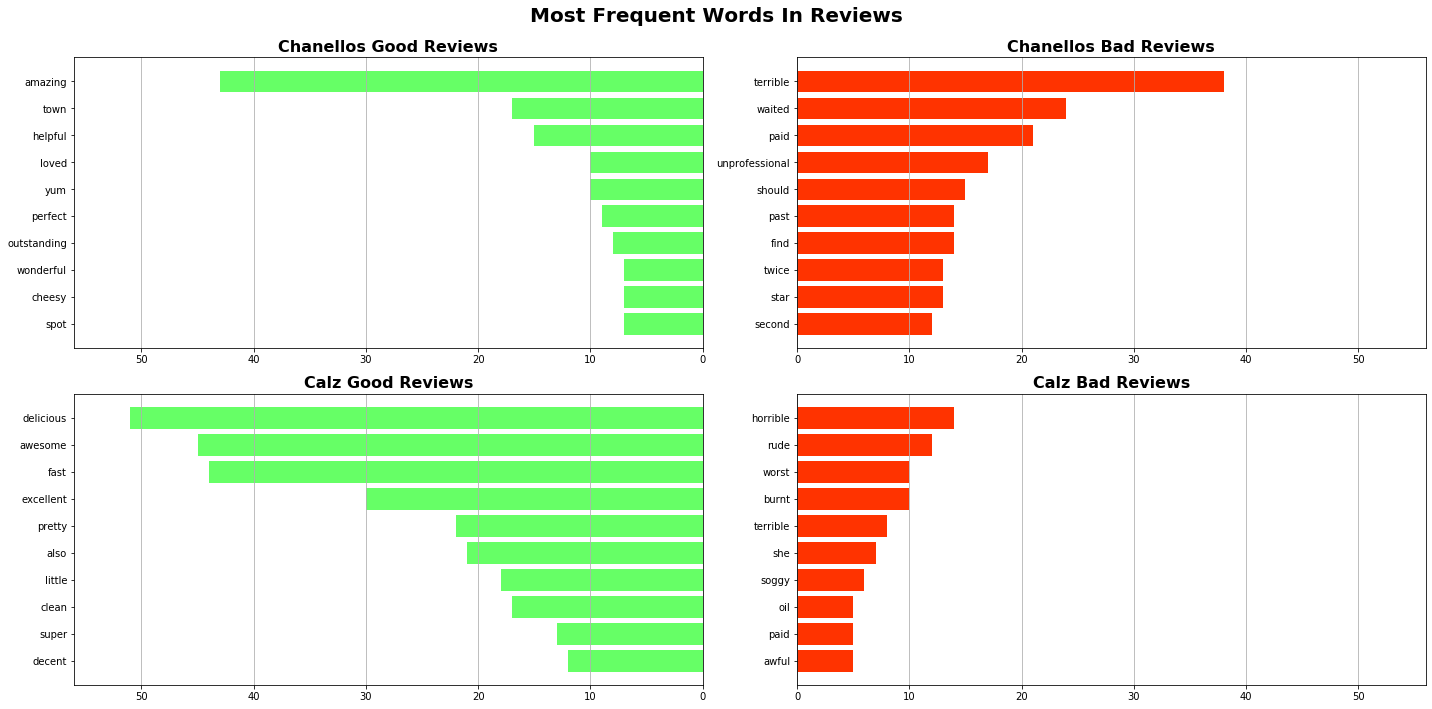

In [192]:
from matplotlib.gridspec import GridSpec
def plot_back2back(chanellos,calz):
    fig=plt.figure(figsize=[20,10])
    gs=GridSpec(2,2,figure=fig)
    ax=fig.add_subplot(gs[0,0])

    # add cchanellos good reviews to the plot
    bar=ax.barh(y=chanellos['good'],width=chanellos['y_good'],color='#66ff66')
    ax.set_title("Chanellos Good Reviews",fontsize=16,fontweight='bold')
    ax.set_xlim(0,56)
    ax.invert_xaxis()
    ax.invert_yaxis()
    ax.grid('on',axis='x')

    # adds chanellos bad reviews to the plot
    ax2=fig.add_subplot(gs[0,1])
    bar2=ax2.barh(y=chanellos['bad'],width=chanellos['y_bad'],color='#ff3300')
    ax2.set_title("Chanellos Bad Reviews",fontsize=16,fontweight='bold')
    ax2.set_xlim(0,56)
    ax2.invert_yaxis()
    ax2.grid('on',axis='x')

    # adds calz good reviews to the plot
    ax3=fig.add_subplot(gs[1,0])
    bar3=ax3.barh(y=calz['good'],width=calz['y_good'],color='#66ff66')
    ax3.set_title("Calz Good Reviews",fontsize=16,fontweight='bold')
    ax3.set_xlim(0,56)
    ax3.invert_xaxis()
    ax3.invert_yaxis()
    ax3.grid('on',axis='x')
    
    # add calz bad reviews to the plot
    ax4=fig.add_subplot(gs[1,1])
    bar4=ax4.barh(y=calz['bad'],width=calz['y_bad'],color='#ff3300')
    ax4.set_title("Calz Bad Reviews",fontsize=16,fontweight='bold')
    ax4.set_xlim(0,56)
    ax4.invert_yaxis()
    ax4.grid('on',axis='x')

    # setting the padding of our bbox for the suptitle
    rect=[0,0,1,0.95]
    fig.suptitle("Most Frequent Words In Reviews",fontsize=20,fontweight='bold')
    plt.tight_layout(rect=rect)
    plt.show()
    return None
plot_back2back(chanellos,calz)

In [176]:
del fig

## data selection for plot two

In [70]:
# encode year from utc timestamp
df['year']=df['time'].apply(lambda x:datetime.fromtimestamp(x).year)
calz_df['year']=calz_df['time'].apply(lambda x:datetime.fromtimestamp(x).year)

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [103]:
def plot_figure2(data1,data2,company1,company2,plot=True):
    fig,(ax,ax1)=plt.subplots(ncols=2,sharey=True)

    # plot from first df
    data1[data1['review_rating']>=4].year.value_counts().sort_index(ascending=False).plot(ax=ax,c='#66ff66',lw=3,label="positive reviews from"+(f" {company1}"))
    data1[data1['review_rating']<=2].year.value_counts().sort_index(ascending=False).plot(ax=ax,c='#ff3300',lw=3,label="negitive reviews from"+(f" {company1}"))
    # plot from second df
    data2[data2['review_rating']>=4].year.value_counts().sort_index(ascending=False).plot(ax=ax1,c='#66ff66',lw=3,label="positive reviews from"+(f" {company2}"))
    data2[data2['review_rating']<=2].year.value_counts().sort_index(ascending=False).plot(ax=ax1,c='#ff3300',lw=3,label="negitive reviews from"+(f" {company2}"))
    
    # set title
    fig.suptitle("Amounts Of Positive/Negitive Reviews By Company Over Time",fontsize=16,fontweight='bold')
    
    # invert one of the plots to back to back
    ax1.invert_xaxis()
    
    # set y axis grid to be displayed
    ax1.grid('on',axis='y')
    ax.grid('on',axis='y')
    
    # show legends
    ax1.legend(fontsize=16)
    ax.legend(fontsize=16)
    # give an option not to show plot
    if plot:
        # use tight layout because it looks better IMO
        fig.tight_layout(rect=[0, 0.03, 1, 0.95])
        return plt.plot()

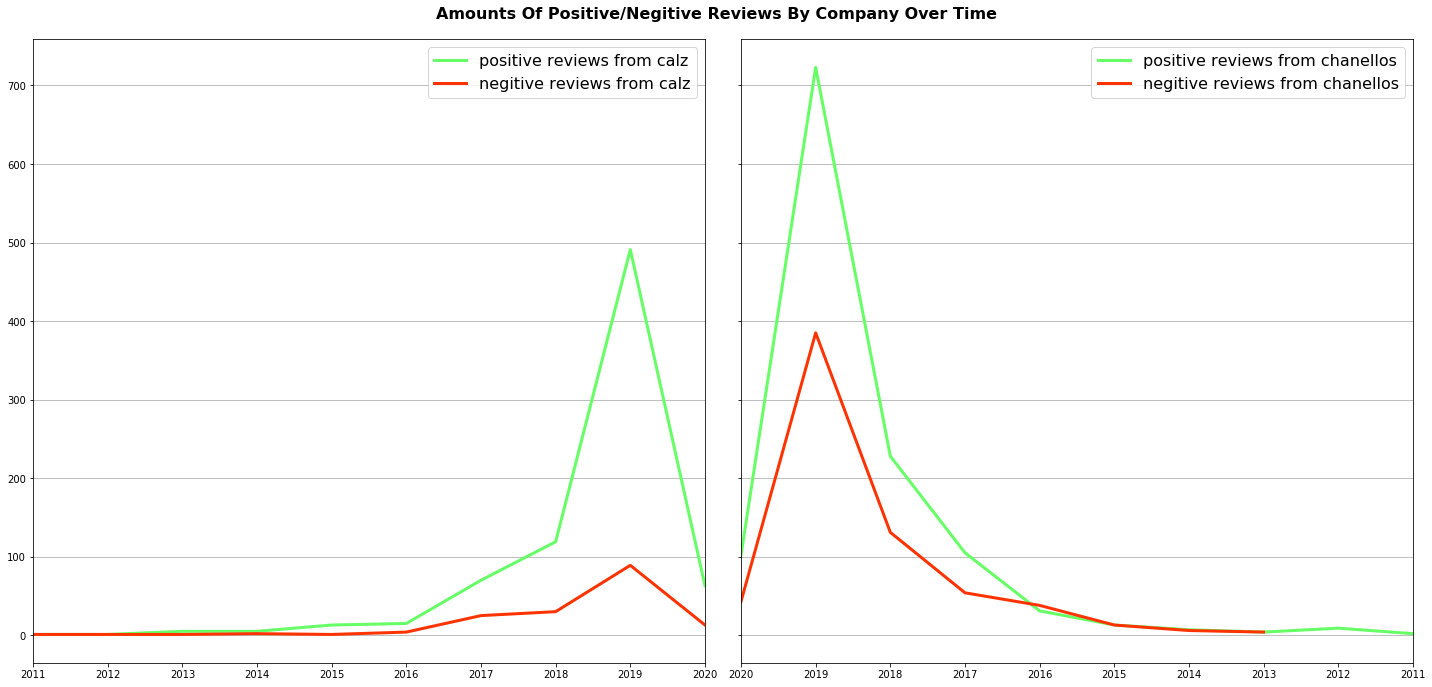

In [104]:
fig=plot_figure2(calz_df,df,"calz","chanellos")